In [27]:
import pandas as pd
try:
    data = pd.read_csv('Intermediate result1.csv')
except FileNotFoundError:
    print("Error: The file 'Intermediate result1.csv' was not found. Please check the file path.")
    exit()
data = data.loc[:, ~data.columns.str.contains('^Unnamed', case=False)]
data = data.dropna(how='all')
try:
    data.to_csv('cleaned_dataset.csv', index=False)
    print("Cleaned dataset saved successfully as 'cleaned_dataset.csv'.")
except Exception as e:
    print(f"Error while saving the file: {e}")
if not data.empty:
    print("Preview of the cleaned dataset:")
    print(data.head())
else:
    print("The dataset is empty after cleaning.")


Cleaned dataset saved successfully as 'cleaned_dataset.csv'.
Preview of the cleaned dataset:
   Roll  Random Roll  HalfYearly English  Yearly English  PreTest English  \
0   1.0        233.0                26.0             0.0             25.0   
1   2.0         32.0                 0.0            38.0             26.0   
2   3.0        115.0                 0.0            43.0              0.0   
3   4.0         14.0                11.0            29.0             13.0   
4   5.0        308.0                 0.0            42.0             33.0   

   Test English  HalfYearly Bangla  Yearly Bangla  PreTest Bangla  \
0          41.0               35.0            0.0            60.0   
1          33.0                0.0           52.0            61.0   
2          14.0                0.0           48.0             0.0   
3          10.0               32.0           48.0            20.0   
4          15.0                0.0           62.0            50.0   

   Test Bangla  ...   PreTest

In [28]:
data = data.dropna()
data

,Roll,Random Roll,HalfYearly English,Yearly English,PreTest English,Test English,HalfYearly Bangla,Yearly Bangla,PreTest Bangla,Test Bangla,...,PreTest Optional,Test Optional,Half Yearly GPA,Yearly GPA,Pre-Test GPA,Test GPA,HSC GPA,Proposed HSC GPA-1,Proposed HSC GPA-2,Performance category
0,1.0,233.0,26.0,0.0,25.0,41.0,35.0,0.0,60.0,47.0,...,67.0,70.0,0.00,A,0.00,0.00,4.83,2.21,1.71,Good
1,2.0,32.0,0.0,38.0,26.0,33.0,0.0,52.0,61.0,53.0,...,65.0,68.0,A,0.00,0.00,2.50,5.00,2.64,2.07,Good
2,3.0,115.0,0.0,43.0,0.0,14.0,0.0,48.0,0.0,33.0,...,0.0,72.0,0.00,0.00,0.00,0.00,4.58,2.07,0.29,Good
3,4.0,14.0,11.0,29.0,13.0,10.0,32.0,48.0,20.0,33.0,...,63.0,36.0,0.00,0.00,0.00,0.00,4.92,1.57,0.86,Good
4,5.0,308.0,0.0,42.0,33.0,15.0,0.0,62.0,50.0,61.0,...,66.0,75.0,A,3.25,3.00,0.00,4.50,2.79,2.50,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,305.0,174.0,14.0,18.0,0.0,33.0,45.0,30.0,0.0,35.0,...,0.0,69.0,0.00,0.00,A,0.00,3.92,1.43,0.43,Good
305,306.0,80.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,...,0.0,0.0,A,0.00,A,A,0.00,1.21,0.00,Poor
306,307.0,212.0,20.0,19.0,0.0,24.0,53.0,36.0,44.0,42.0,...,61.0,72.0,0.00,0.00,A,0.00,4.50,2.07,1.79,Good
307,308.0,185.0,33.0,24.0,15.0,20.0,64.0,40.0,26.0,41.0,...,0.0,45.0,2.75,0.00,0.00,0.00,3.75,1.71,1.00,Good


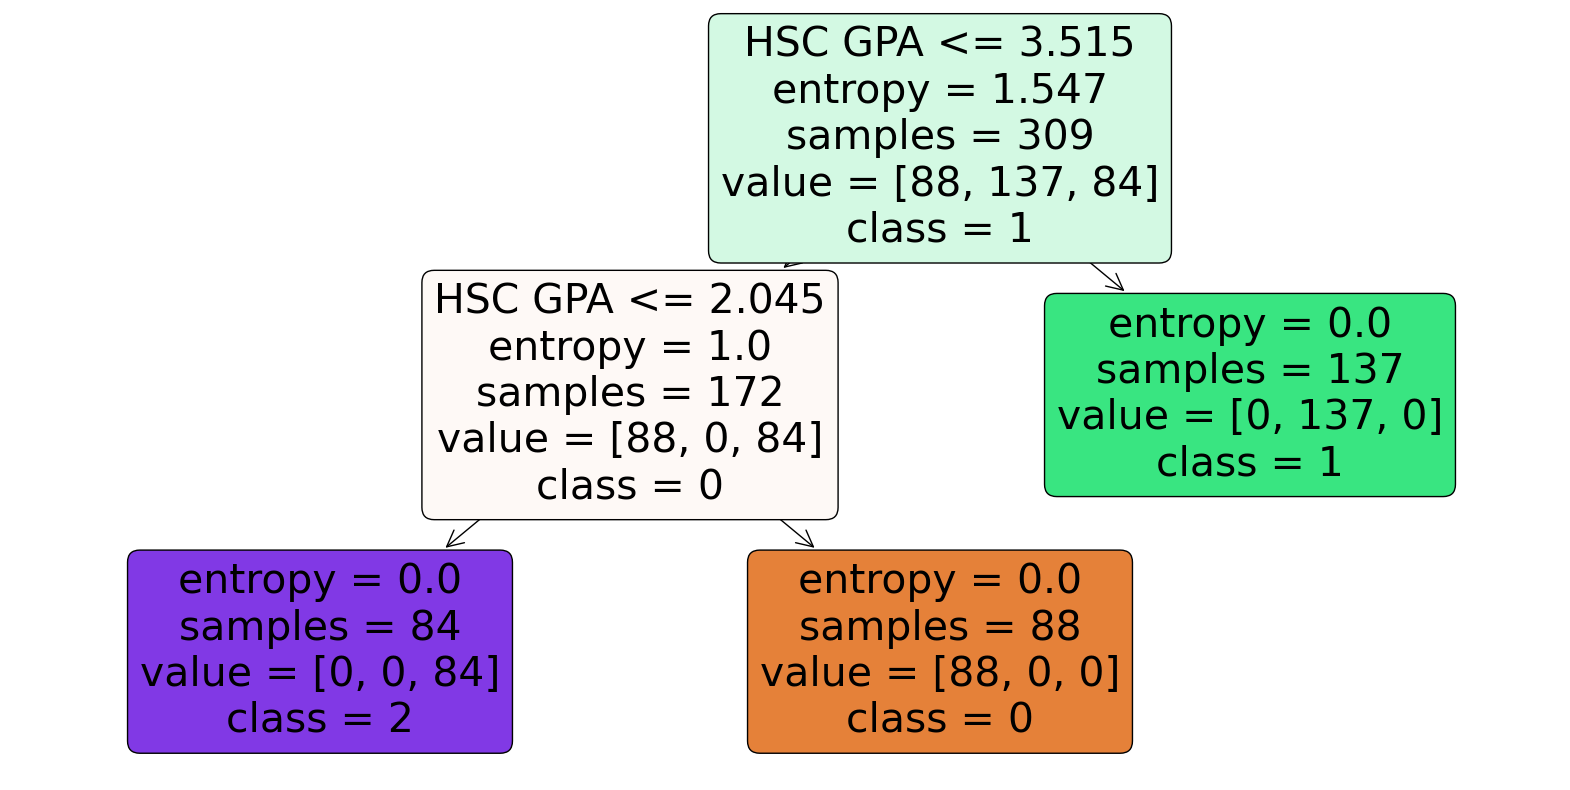

In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
file_path = r'C:\Users\YAJNASRI\Downloads\Intermediate result1.xlsx'  # Update with your dataset path
data = pd.read_excel(file_path)
encoder = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':  
        data[col] = data[col].astype(str) 
        data[col] = encoder.fit_transform(data[col])
target_column = 'Performance category'  
data[target_column] = data[target_column].astype(str)
y = encoder.fit_transform(data[target_column]) 
X = data.drop(target_column, axis=1) 
# Step 3: Build the decision tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)  # Adjust max_depth as needed
clf.fit(X, y)
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    filled=True,
    feature_names=X.columns,
    class_names=encoder.classes_,
    rounded=True
)
plt.show()


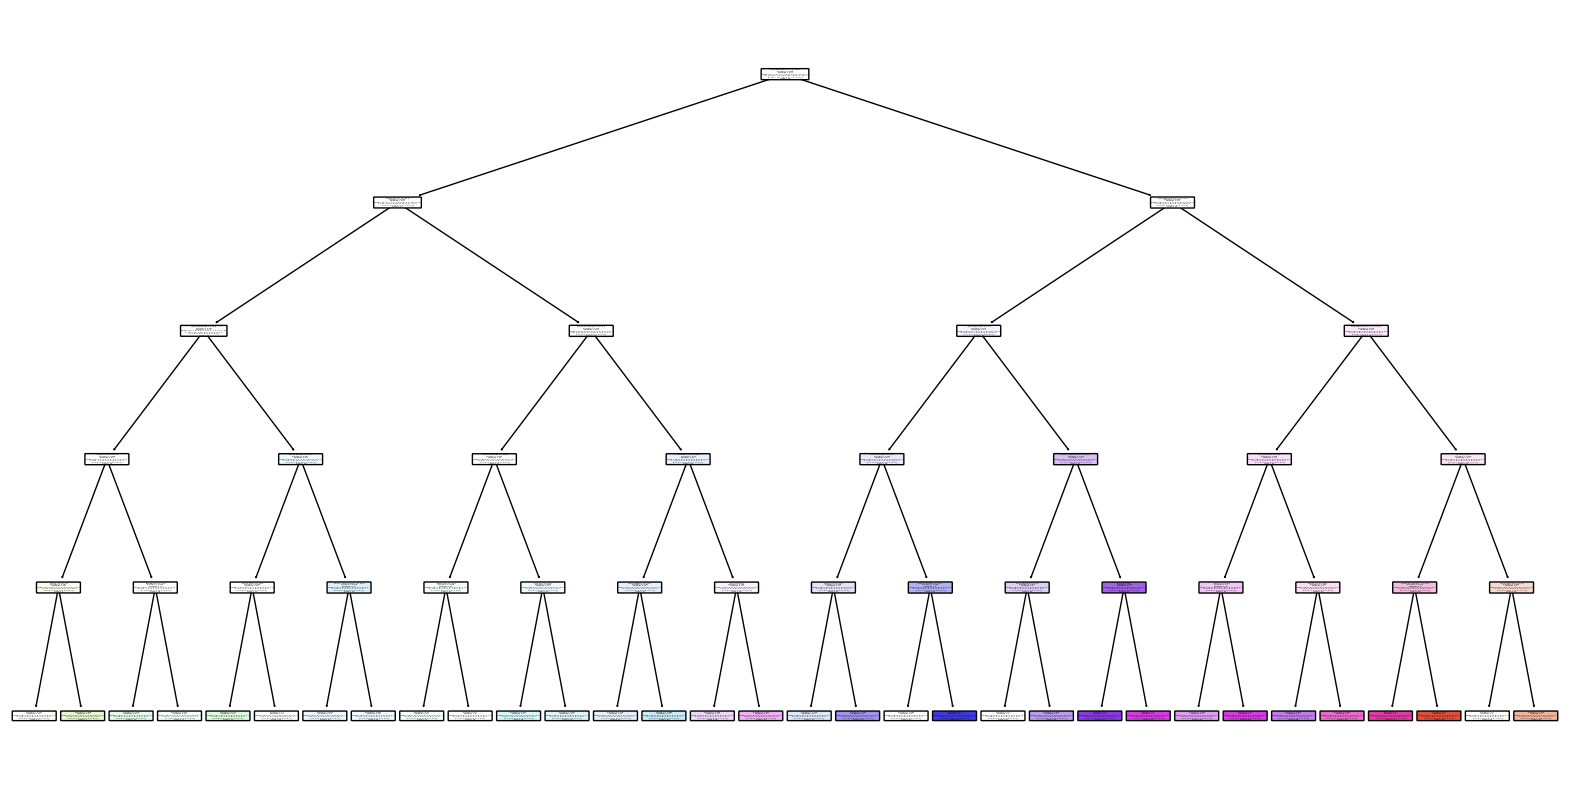

In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
file_path = r'C:\Users\YAJNASRI\Downloads\Intermediate result1.xlsx'
data = pd.read_excel(file_path)

# Step 2: Preprocess the data
encoder = LabelEncoder()

# Encode categorical columns
for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype == 'float64' or data[col].dtype == 'int64':
        data[col] = data[col].astype(str)  # Ensure everything is treated as a string
        data[col] = encoder.fit_transform(data[col])

# Ensure the target column is also correctly encoded
y = data['Proposed HSC  GPA-1'].astype(int)  # Explicitly convert target column to integer
X = data.drop('Proposed HSC  GPA-1', axis=1)

# Step 3: Build the decision tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)  # You can adjust the depth
clf.fit(X, y)

# Step 4: Visualize the decision tree
# Convert the class names (target) to string for proper display in the plot
class_names = [str(i) for i in clf.classes_]

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names, rounded=True)
plt.show()


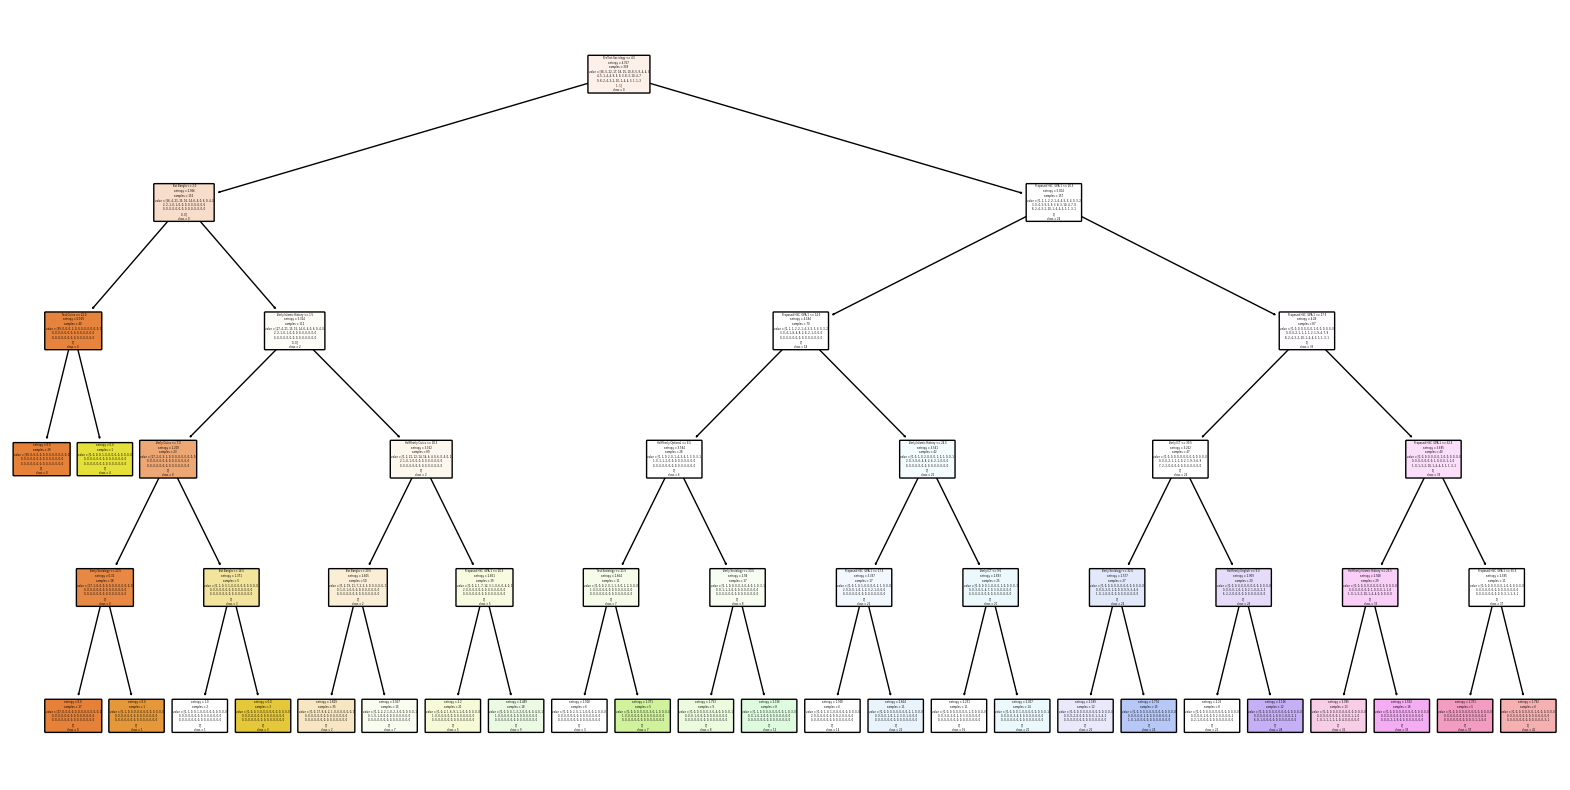

In [30]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

file_path = r'C:\\Users\\YAJNASRI\\Downloads\\Intermediate result1.xlsx'
data = pd.read_excel(file_path)

encoder = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype == 'float64' or data[col].dtype == 'int64':
        data[col] = data[col].astype(str)
        data[col] = encoder.fit_transform(data[col])

y = data['Proposed HSC GPA-2'].astype(int)
X = data.drop('Proposed HSC GPA-2', axis=1)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X, y)

class_names = [str(i) for i in clf.classes_]

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names, rounded=True)
plt.show()


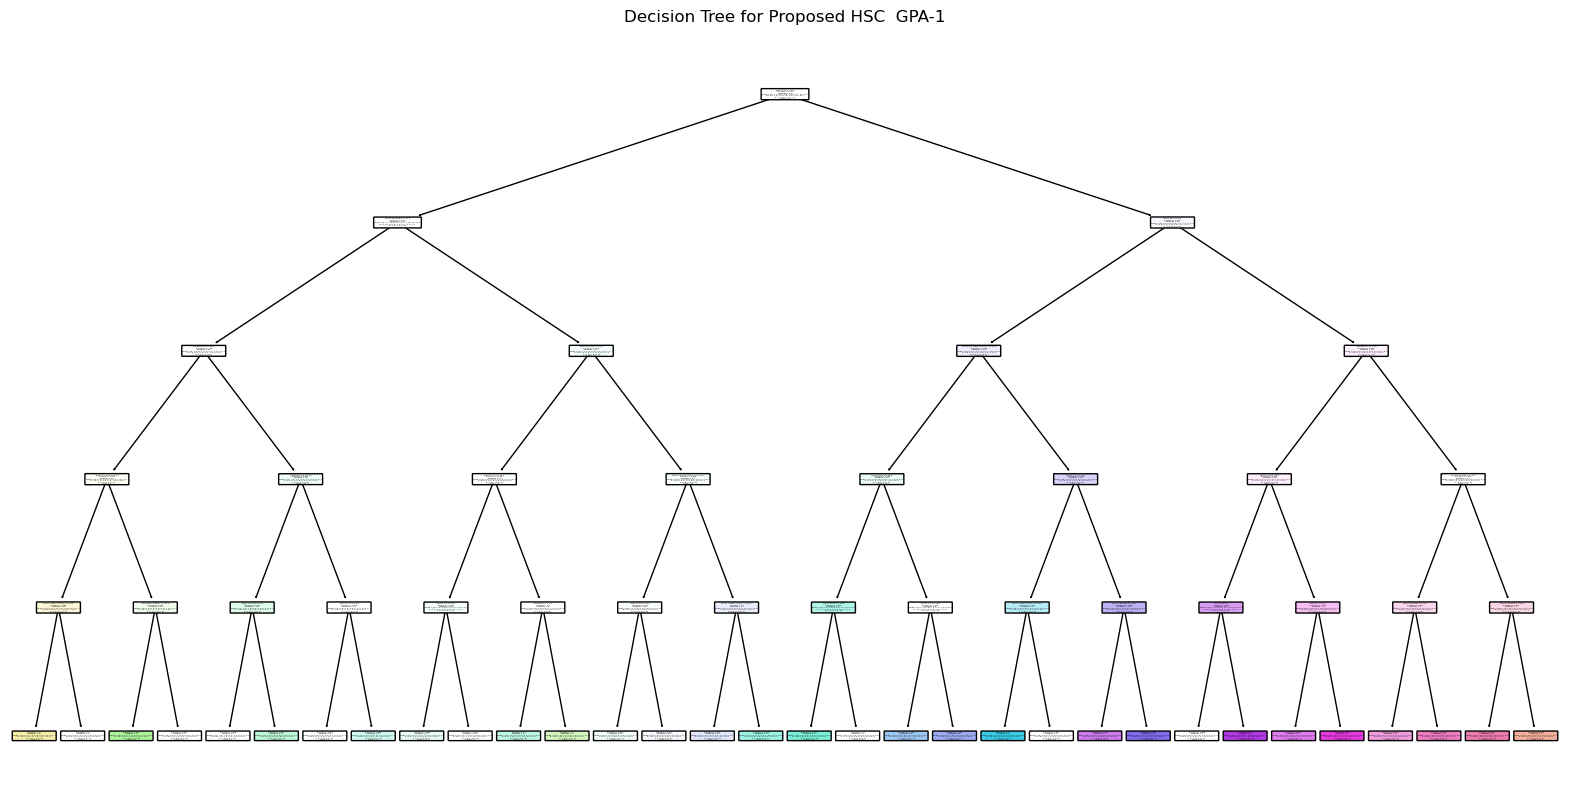

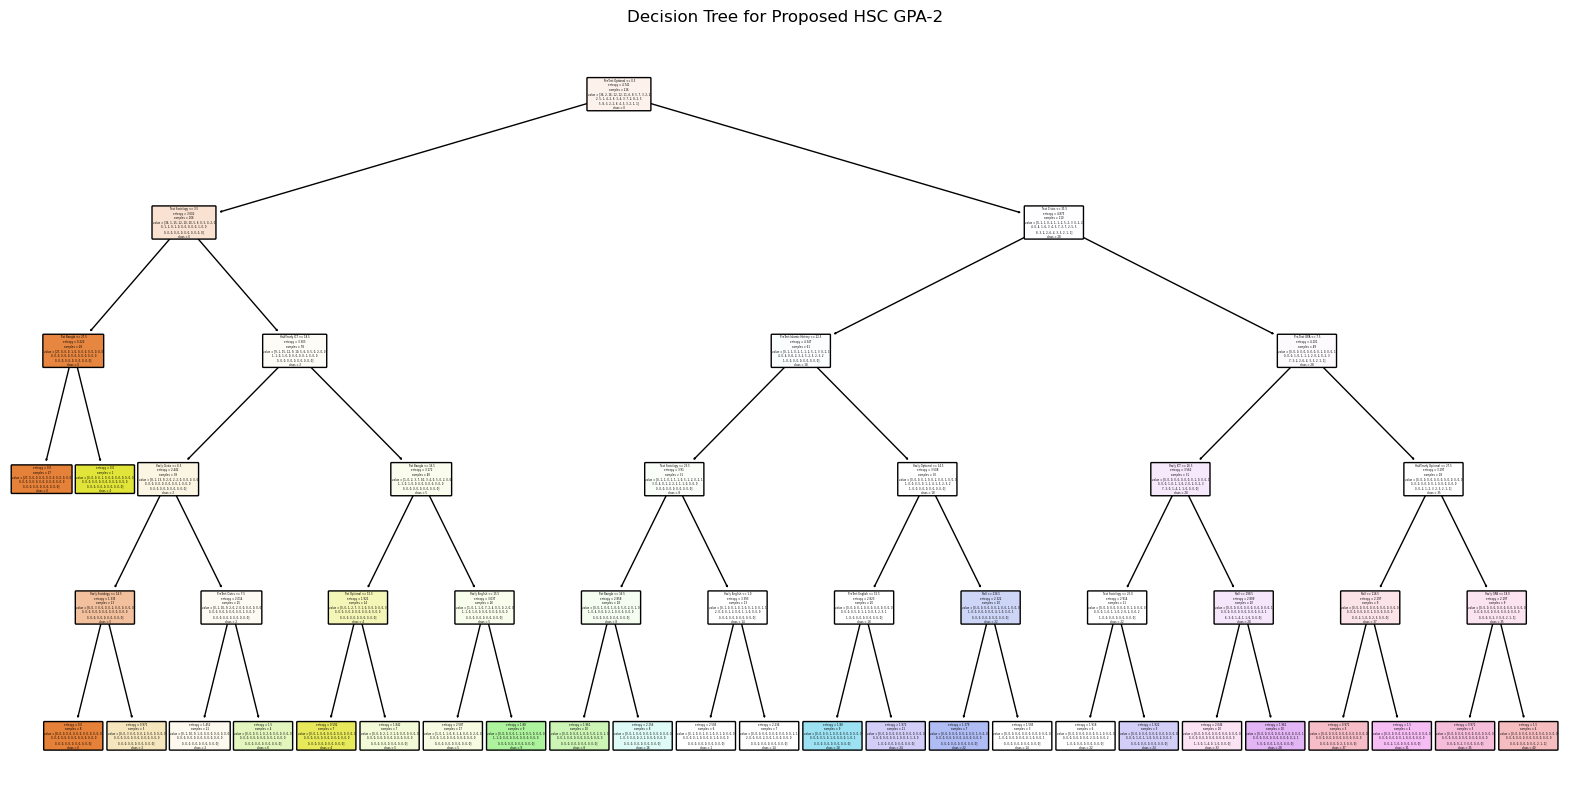

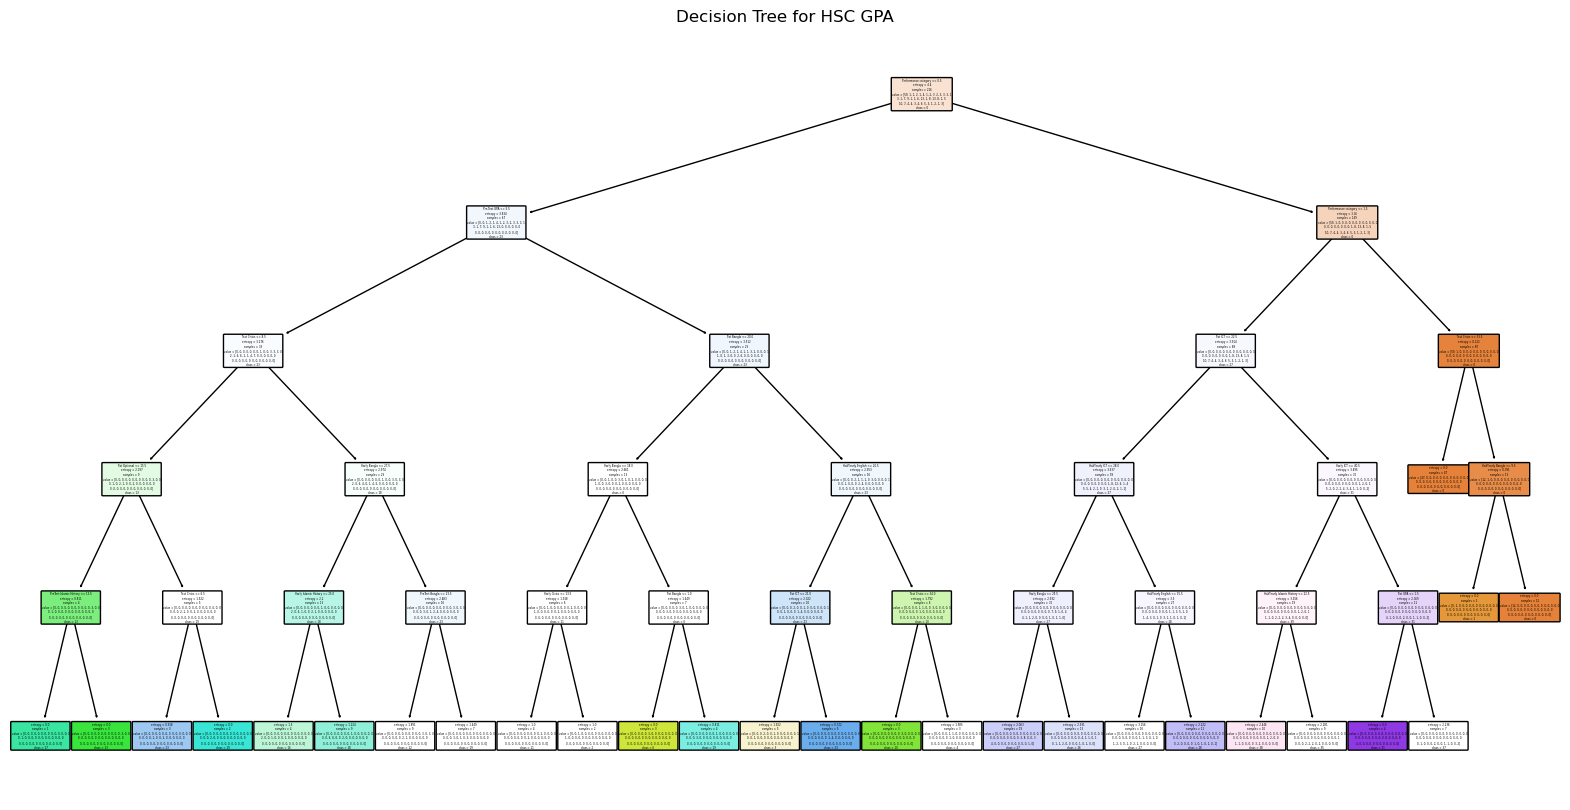

                     Accuracy  F1 Score
Proposed HSC  GPA-1  0.064516  0.033184
Proposed HSC GPA-2   0.322581  0.306912
HSC GPA              0.354839  0.318882


In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
file_path = r'C:\\Users\\YAJNASRI\\Downloads\\Intermediate result1.xlsx'  # Update with your dataset path
data = pd.read_excel(file_path)

# Step 2: Preprocess the data
encoder = LabelEncoder()

# Encode categorical columns
for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype == 'float64' or data[col].dtype == 'int64':
        data[col] = data[col].astype(str)  # Ensure everything is treated as a string
        data[col] = encoder.fit_transform(data[col])

# Split data into features (X) and different target variables (y)
X = data.drop(['Proposed HSC  GPA-1', 'Proposed HSC GPA-2', 'HSC GPA'], axis=1)

# Target Variables
targets = ['Proposed HSC  GPA-1', 'Proposed HSC GPA-2', 'HSC GPA']
results = {}

for target in targets:
    y = data[target]
    
    # Step 3: Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Step 4: Train the decision tree model
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
    clf.fit(X_train, y_train)
    
    # Step 5: Make predictions
    y_pred = clf.predict(X_test)
    
    # Step 6: Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store the results
    results[target] = {
        'Accuracy': accuracy,
        'F1 Score': f1
    }
    
    # Step 7: Visualize the decision tree
    plt.figure(figsize=(20,10))
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=[str(i) for i in clf.classes_], rounded=True)
    plt.title(f"Decision Tree for {target}")
    plt.show()

# Step 8: Compare the results
comparison_df = pd.DataFrame(results).T
print(comparison_df)


In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
import io
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load the dataset
file_path = r'C:\\Users\\YAJNASRI\\Downloads\\Intermediate result1.xlsx'  # Update with your dataset path
data = pd.read_excel(file_path)

# Step 2: Preprocess the data
encoder = LabelEncoder()

# Encode categorical columns
for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype == 'float64' or data[col].dtype == 'int64':
        data[col] = data[col].astype(str)  # Ensure everything is treated as a string
        data[col] = encoder.fit_transform(data[col])

# Step 3: Prepare Features (X) and Target Variables (y)
X = data.drop(['Proposed HSC  GPA-1', 'Proposed HSC GPA-2', 'HSC GPA'], axis=1)

# Target Variables to Compare
targets = ['Proposed HSC  GPA-1', 'Proposed HSC GPA-2', 'HSC GPA']

# Results Storage
results = []

# Step 4: Train and Evaluate Decision Trees (DT-GI and DT-IG)
for target in targets:
    y = data[target]
    
    # Split data into training and test sets (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize Decision Tree with Gini Index (DT-GI)
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)
    clf_gini.fit(X_train, y_train)
    y_pred_gini = clf_gini.predict(X_test)
    
    # Initialize Decision Tree with Information Gain (DT-IG)
    clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5)
    clf_entropy.fit(X_train, y_train)
    y_pred_entropy = clf_entropy.predict(X_test)
    
    # Calculate Metrics for DT-GI (Gini Index)
    accuracy_gini = accuracy_score(y_test, y_pred_gini)
    f1_gini = f1_score(y_test, y_pred_gini, average='weighted')
    kappa_gini = cohen_kappa_score(y_test, y_pred_gini)
    conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
    precision_gini = precision_score(y_test, y_pred_gini, average='weighted')
    recall_gini = recall_score(y_test, y_pred_gini, average='weighted')
    
    # Calculate Metrics for DT-IG (Information Gain)
    accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
    f1_entropy = f1_score(y_test, y_pred_entropy, average='weighted')
    kappa_entropy = cohen_kappa_score(y_test, y_pred_entropy)
    conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
    precision_entropy = precision_score(y_test, y_pred_entropy, average='weighted')
    recall_entropy = recall_score(y_test, y_pred_entropy, average='weighted')
    
    # Store the results for both classifiers (DT-GI and DT-IG)
    results.append({
        'Target': target,
        'DT-GI Accuracy': accuracy_gini * 100,  # Convert to percentage
        'DT-IG Accuracy': accuracy_entropy * 100,  # Convert to percentage
        'DT-GI F1-Score': f1_gini,
        'DT-IG F1-Score': f1_entropy,
        'DT-GI Kappa': kappa_gini,
        'DT-IG Kappa': kappa_entropy,
        'DT-GI Precision': precision_gini,
        'DT-IG Precision': precision_entropy,
        'DT-GI Recall': recall_gini,
        'DT-IG Recall': recall_entropy,
        'DT-GI Confusion Matrix': conf_matrix_gini.tolist(),
        'DT-IG Confusion Matrix': conf_matrix_entropy.tolist()
    })

# Step 5: Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Step 6: Display Results
print(results_df)


                Target  DT-GI Accuracy  DT-IG Accuracy  DT-GI F1-Score  \
0  Proposed HSC  GPA-1        6.451613       11.290323        0.067742   
1   Proposed HSC GPA-2       35.483871       30.645161        0.320521   
2              HSC GPA       35.483871       38.709677        0.346774   

   DT-IG F1-Score  DT-GI Kappa  DT-IG Kappa  DT-GI Precision  DT-IG Precision  \
0        0.043035     0.026793     0.081605         0.080645         0.027173   
1        0.287097     0.288379     0.233908         0.319086         0.278802   
2        0.363799     0.258373     0.291642         0.344086         0.356855   

   DT-GI Recall  DT-IG Recall  \
0      0.064516      0.112903   
1      0.354839      0.306452   
2      0.354839      0.387097   

                              DT-GI Confusion Matrix  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...   
1  [[16, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   
2  [[21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   

                    

In [26]:
###RANDOM FOREST**********************************

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, confusion_matrix, precision_score, recall_score

# Load the data
file_path = r'C:\\Users\\YAJNASRI\\Downloads\\Intermediate result1.xlsx'  # Update with your dataset path
data = pd.read_excel(file_path)

# Replace non-numeric values with 0.00 (adjust as per your data)
data = data.apply(pd.to_numeric, errors='coerce').fillna(0.00)

# Define target variables
target_vars = ['HSC GPA', 'Proposed HSC  GPA-1', 'Proposed HSC GPA-2']

# Apply the classification threshold (e.g., 3.0) to each target variable
threshold = 3.0
for target in target_vars:
    data[f'{target}_Class'] = (data[target] >= threshold).astype(int)

# Function to calculate metrics for each target variable
def calculate_metrics(target):
    # Select the target variable and its corresponding class label
    y = data[f'{target}_Class']
    X = data.drop(columns=target_vars + [f'{target}_Class'])

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize Random Forest Classifier
    rf_classifier = RandomForestClassifier(random_state=42)

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_classifier.predict(X_test)

    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Return the results for the target variable
    return {
        'Accuracy': accuracy * 100,
        'F1-Score': f1,
        'Kappa': kappa,
        'Precision': precision,
        'Recall': recall,
        'Confusion Matrix': conf_matrix
    }

# Create an empty dictionary to store metrics for each target
metrics_results = {}

# Calculate metrics for each target variable
for target in target_vars:
    metrics_results[target] = calculate_metrics(target)

# Convert the metrics into a DataFrame for a table format
metrics_df = pd.DataFrame(metrics_results).T  # Transpose to get targets as rows
metrics_df.index.name = 'Target Variables'

# Display the results
print(metrics_df)


                      Accuracy  F1-Score     Kappa Precision    Recall  \
Target Variables                                                         
HSC GPA              75.268817  0.824427  0.424226  0.739726  0.931034   
Proposed HSC  GPA-1  96.774194  0.571429  0.557845       1.0       0.4   
Proposed HSC GPA-2   96.774194  0.666667  0.649937       0.6      0.75   

                        Confusion Matrix  
Target Variables                          
HSC GPA              [[16, 19], [4, 54]]  
Proposed HSC  GPA-1    [[88, 0], [3, 2]]  
Proposed HSC GPA-2     [[87, 2], [1, 3]]  


In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
file_path = r'C:\\Users\\YAJNASRI\\Downloads\\Intermediate result1.xlsx'  # Update with your dataset path
data = pd.read_excel(file_path)

# Step 2: Preprocess the data
encoder = LabelEncoder()

# Encode categorical columns
for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype == 'float64' or data[col].dtype == 'int64':
        data[col] = data[col].astype(str)  # Ensure everything is treated as a string
        data[col] = encoder.fit_transform(data[col])

# Step 3: Prepare Features (X) and Target Variables (y)
X = data.drop(['Proposed HSC  GPA-1', 'Proposed HSC GPA-2', 'HSC GPA'], axis=1)

# Target Variables to Compare
targets = ['Proposed HSC  GPA-1', 'Proposed HSC GPA-2', 'HSC GPA']

# Results Storage
results = []

# Step 4: Train and Evaluate Random Forest Models (RF-GI and RF-IG)
for target in targets:
    y = data[target]
    
    # Split data into training and test sets (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # RF-GI: Random Forest with Gini Index (default)
    rf_gini = RandomForestClassifier(criterion='gini', random_state=42)
    rf_gini.fit(X_train, y_train)
    y_pred_gini = rf_gini.predict(X_test)
    
    # RF-IG: Random Forest with Information Gain (Entropy)
    rf_entropy = RandomForestClassifier(criterion='entropy', random_state=42)
    rf_entropy.fit(X_train, y_train)
    y_pred_entropy = rf_entropy.predict(X_test)
    
    # Calculate Metrics for RF-GI (Gini Index)
    accuracy_gini = accuracy_score(y_test, y_pred_gini)
    f1_gini = f1_score(y_test, y_pred_gini, average='weighted')
    kappa_gini = cohen_kappa_score(y_test, y_pred_gini)
    conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
    precision_gini = precision_score(y_test, y_pred_gini, average='weighted')
    recall_gini = recall_score(y_test, y_pred_gini, average='weighted')
    
    # Calculate Metrics for RF-IG (Information Gain)
    accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
    f1_entropy = f1_score(y_test, y_pred_entropy, average='weighted')
    kappa_entropy = cohen_kappa_score(y_test, y_pred_entropy)
    conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
    precision_entropy = precision_score(y_test, y_pred_entropy, average='weighted')
    recall_entropy = recall_score(y_test, y_pred_entropy, average='weighted')
    
    # Store the results for both classifiers (RF-GI and RF-IG)
    results.append({
        'Target': target,
        'RF-GI Accuracy': accuracy_gini * 100,  # Convert to percentage
        'RF-IG Accuracy': accuracy_entropy * 100,  # Convert to percentage
        'RF-GI F1-Score': f1_gini,
        'RF-IG F1-Score': f1_entropy,
        'RF-GI Kappa': kappa_gini,
        'RF-IG Kappa': kappa_entropy,
        'RF-GI Precision': precision_gini,
        'RF-IG Precision': precision_entropy,
        'RF-GI Recall': recall_gini,
        'RF-IG Recall': recall_entropy,
        'RF-GI Confusion Matrix': conf_matrix_gini.tolist(),
        'RF-IG Confusion Matrix': conf_matrix_entropy.tolist()
    })

# Step 5: Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Step 6: Display Results
print(results_df)


                Target  RF-GI Accuracy  RF-IG Accuracy  RF-GI F1-Score  \
0  Proposed HSC  GPA-1       12.903226       16.129032        0.088262   
1   Proposed HSC GPA-2       40.322581       41.935484        0.352320   
2              HSC GPA       41.935484       38.709677        0.391201   

   RF-IG F1-Score  RF-GI Kappa  RF-IG Kappa  RF-GI Precision  RF-IG Precision  \
0        0.115574     0.097087     0.130763         0.082081         0.116294   
1        0.385919     0.331390     0.352104         0.331528         0.383503   
2        0.300077     0.325680     0.237540         0.380572         0.251564   

   RF-GI Recall  RF-IG Recall  \
0      0.129032      0.161290   
1      0.403226      0.419355   
2      0.419355      0.387097   

                              RF-GI Confusion Matrix  \
0  [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1  [[17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   
2  [[21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...   

                    

In [ ]:
#RF-GI is greater for Accuracy with value 41.935484
#RF-GI is greater for Precision with value 0.380572
#RF-GI is greater for Kappa with value 0.32568
#RF-GI is greater for Recall with value 0.419355



In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, cohen_kappa_score, 
    precision_score, recall_score
)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
# Step 1: Load the dataset
file_path = r'C:\\Users\\YAJNASRI\\Downloads\\Intermediate result1.xlsx'  # Update with your dataset path
data = pd.read_excel(file_path)

# Step 2: Preprocess the data
encoder = LabelEncoder()

# Encode categorical columns
for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype == 'float64' or data[col].dtype == 'int64':
        data[col] = data[col].astype(str)  # Ensure everything is treated as a string
        data[col] = encoder.fit_transform(data[col])

# Step 3: Prepare Features (X) and Target Variables (y)
X = data.drop(['Proposed HSC  GPA-1', 'Proposed HSC GPA-2', 'HSC GPA'], axis=1)

# Target Variables to Compare
targets = ['Proposed HSC  GPA-1', 'Proposed HSC GPA-2', 'HSC GPA']

# Step 4: Train and Evaluate Models (DT-GI, DT-IG, RF-GI, RF-IG)
table = []  # Storage for results table

for target in targets:
    y = data[target]
    
    # Split data into training and test sets (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Random Forest with Gini Index (RF-GI)
    rf_gini = RandomForestClassifier(criterion='gini', random_state=42)
    rf_gini.fit(X_train, y_train)
    y_pred_rf_gini = rf_gini.predict(X_test)
    
    # Random Forest with Information Gain (Entropy) (RF-IG)
    rf_entropy = RandomForestClassifier(criterion='entropy', random_state=42)
    rf_entropy.fit(X_train, y_train)
    y_pred_rf_entropy = rf_entropy.predict(X_test)
    
    # Metrics for RF-GI
    accuracy_rf_gini = accuracy_score(y_test, y_pred_rf_gini)
    f1_rf_gini = f1_score(y_test, y_pred_rf_gini, average='weighted')
    kappa_rf_gini = cohen_kappa_score(y_test, y_pred_rf_gini)
    precision_rf_gini = precision_score(y_test, y_pred_rf_gini, average='weighted')
    recall_rf_gini = recall_score(y_test, y_pred_rf_gini, average='weighted')
    
    # Metrics for RF-IG
    accuracy_rf_entropy = accuracy_score(y_test, y_pred_rf_entropy)
    f1_rf_entropy = f1_score(y_test, y_pred_rf_entropy, average='weighted')
    kappa_rf_entropy = cohen_kappa_score(y_test, y_pred_rf_entropy)
    precision_rf_entropy = precision_score(y_test, y_pred_rf_entropy, average='weighted')
    recall_rf_entropy = recall_score(y_test, y_pred_rf_entropy, average='weighted')
    
    # Append Results in Desired Table Format
    table.append({
        'Model': 'RF-GI',
        'Target': target,
        'ACCURACY': f"{accuracy_rf_gini * 100:.2f}",
        'F1-SCORE': f"{f1_rf_gini * 100:.2f}",
        'KAPPA’S': f"{kappa_rf_gini:.2f}",
        'PRECISION': f"{precision_rf_gini * 100:.2f}",
        'RECALL': f"{recall_rf_gini * 100:.2f}"
    })
    
    table.append({
        'Model': 'RF-IG',
        'Target': target,
        'ACCURACY': f"{accuracy_rf_entropy * 100:.2f}",
        'F1-SCORE': f"{f1_rf_entropy * 100:.2f}",
        'KAPPA’S': f"{kappa_rf_entropy:.2f}",
        'PRECISION': f"{precision_rf_entropy * 100:.2f}",
        'RECALL': f"{recall_rf_entropy * 100:.2f}"
    })

# Step 5: Convert results to DataFrame for easy viewing
final_table = pd.DataFrame(table)

# Step 6: Display Results
print("\n--- Final Results Table ---")
print(final_table)

# Step 7: Save to Excel (Optional)
output_path = r'C:\\Users\\YAJNASRI\\Downloads\\final_results.xlsx'
final_table.to_excel(output_path, index=False)
print(f"\nResults table saved to: {output_path}")



--- Final Results Table ---
   Model               Target ACCURACY F1-SCORE KAPPA’S PRECISION RECALL
0  RF-GI  Proposed HSC  GPA-1    14.52     9.78    0.11      8.47  14.52
1  RF-IG  Proposed HSC  GPA-1    12.90     7.25    0.10      6.18  12.90
2  RF-GI   Proposed HSC GPA-2    41.94    35.36    0.35     31.83  41.94
3  RF-IG   Proposed HSC GPA-2    43.55    38.81    0.37     36.31  43.55
4  RF-GI              HSC GPA    40.32    38.33    0.31     38.05  40.32
5  RF-IG              HSC GPA    41.94    32.96    0.27     30.63  41.94

Results table saved to: C:\\Users\\YAJNASRI\\Downloads\\final_results.xlsx
